In [8]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import preprocessing, linear_model
def scale_plot_size(factor=3.0):
    default_figsize = mpl.rcParamsDefault['figure.figsize']
    mpl.rcParams['figure.figsize'] = [val*factor for val in default_figsize]
scale_plot_size(1.5)

In [9]:
training_set_path = os.path.expanduser('~/Vibrational_Analysis/data/CMAPSSData/training_set')
processed_training_set_path = os.path.expanduser('~/Vibrational_Analysis/data/CMAPSSData/training_set/processed')
if not os.path.exists(processed_training_set_path):
    os.mkdir(processed_training_set_path)
test_set_path = '~/Vibrational_Analysis/data/CMAPSSData/test_set'

header = ["unit", "time"]
for op in range(1, 4):
    header.append("opSetting"+str(op))
for op in range(1, 22):
    header.append("sensor"+str(op))
for sets in os.listdir(os.path.expanduser(training_set_path)):
    if not sets.startswith('train'):
        continue
    print (training_set_path+"/"+sets)
    df = pd.read_csv(training_set_path+"/"+sets, sep = " ", header=None)
    df = df.dropna(axis=1, how='all')
    df.columns = header
    RULS = []
    for unit in df['unit'].unique():
        RULS.append(df['unit'].value_counts()[unit])
    temp = []
    for i in RULS:
        for j in range(i):
            temp.append(i)
    df['RUL'] = temp
    df['RUL'] = df['RUL'].subtract(df['time'])
#     for cols in df.columns:
#         print(cols, " : ", len(df.loc[:][cols].unique()))
    df.to_csv(processed_training_set_path+"/"+sets, index=False)

/home/atharv/Vibrational_Analysis/data/CMAPSSData/training_set/train_FD002.txt
/home/atharv/Vibrational_Analysis/data/CMAPSSData/training_set/train_FD004.txt
/home/atharv/Vibrational_Analysis/data/CMAPSSData/training_set/train_FD003.txt
/home/atharv/Vibrational_Analysis/data/CMAPSSData/training_set/train_FD001.txt


In [10]:
def normalizeDataFrame(df):
    scaler = preprocessing.MinMaxScaler() 
    scaled_values = scaler.fit_transform(df) 
    df.loc[:,:] = scaled_values
    return df

for sets in os.listdir(os.path.expanduser(processed_training_set_path)):
    if not sets.startswith('train'):
        continue
    df = pd.read_csv(processed_training_set_path+"/"+sets, low_memory=False)
#     df = normalizeDataFrame(df)
    df = df.dropna(axis=1, how='all')
#     df
# for cols in df.columns:
#     print(cols, " : ", len(df.loc[:][cols].unique()))
#     if len(df.loc[:][cols].unique()) == 100:

In [11]:
# data = df.loc[df['Unit'] == i]['sensor21']
# plt.plot(data, stats.exponweib.pdf(data, *stats.exponweib.fit(data, 1, 1, scale=2, loc=0)))
# _ = plt.hist(data, bins=np.linspace(0, 16, 33), normed=True, alpha=0.5);
# plt.show()

In [12]:
# # print (df)
# for num, i in enumerate(df['unit'].unique()):
# #     dfTemp = normalizeDataFrame(df.loc[df['Unit'] == i])
# #     dfTemp = dfTemp.resample('S')
# #     dfTemp = dfTemp.interpolate()
#     plt.plot(dfTemp['time'], dfTemp['sensor21'])
#     dfTemp = dfTemp.rolling(10).mean()
#     plt.plot(dfTemp['time'], dfTemp['sensor21'])
#     if num == 0:
#         break
# #     break
#     # df.loc[df['Unit'] == '1']
# plt.show()

noOfFeatures =  24 24


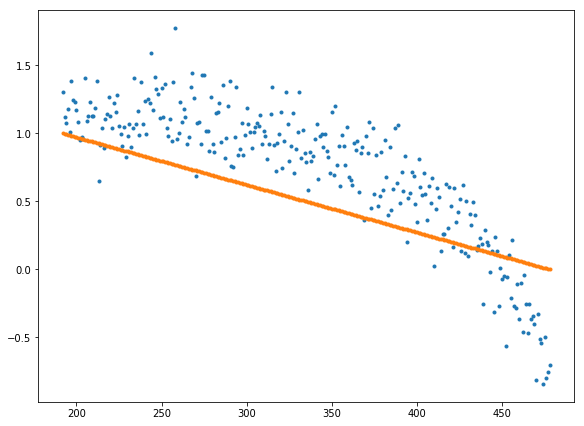

In [28]:
dataFrame = df.loc[df['unit'] == 1].drop(['unit', 'time'], axis=1)
dataFrame = dataFrame.rolling(10).mean()
dataFrameTest = dataFrameTest.rolling(10).mean()
dataFrame = dataFrame.dropna(axis=0, how='all')
dataFrameTest = dataFrameTest.dropna(axis=0, how='all')
# dfTrain = df.loc[df['Unit'] == 1].drop(['Unit'], axis=1)
dataFrameTest = df.loc[df['unit'] == 2].drop(['unit', 'time'], axis=1)
dataFrame = normalizeDataFrame(dataFrame)
dataFrameTest = normalizeDataFrame(dataFrameTest)
noOfSamples = dataFrame.shape[0]
noOfFeatures = dataFrame.shape[1] - 1
noOfFeaturesTest = dataFrameTest.shape[1] - 1
targetColumnName = list(dataFrame)[noOfFeatures]
print ("noOfFeatures = ", noOfFeatures, noOfFeaturesTest)
# print (dataFrame.head())
# print (dataFrameTest.head())
# print (dataFrame.tail())
# print (dataFrameTest.tail())

x = dataFrame.iloc[:, :noOfFeatures]
y = dataFrame[targetColumnName]
xTest = dataFrameTest.iloc[:, :noOfFeaturesTest]
yTest = dataFrameTest[targetColumnName]

regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(x, y)
dataFrameTest['pred_y_skLearn'] = regr.predict(xTest)
# print (dataFrameTest)
# plt.plot(dataFrameTest['RUL'], dataFrameTest['pred_y_skLearn'], '.')
# plt.plot(dataFrameTest['time'], dataFrameTest['pred_y_skLearn'], '.')
# plt.plot(dataFrameTest['time'], dataFrameTest['RUL'], '.')
plt.plot(dataFrameTest['pred_y_skLearn'], '.')
plt.plot(dataFrameTest['RUL'], '.')
plt.show()
# print (dataFrame.head())
# print (dataFrameTest.head())